In [1]:
#import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki
sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
contdata = pd.read_csv("RLDDMS1_contingent.csv")
contdata.head()

,subj_idx,trial_number,stim,split_by,response,rt,feedback,q_init,reward
0,2,66,difficult,2,1,0.466,1,0.5,CR
1,2,67,difficult,2,1,0.466,1,0.5,CR
2,2,68,easy,3,1,0.680,1,0.5,CR
3,2,69,difficult,2,1,0.599,1,0.5,CR
4,2,70,difficult,2,0,0.517,0,0.5,CR


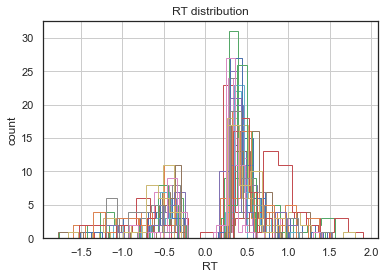

In [3]:
contdata = hddm.utils.flip_errors(contdata)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel = 'RT', ylabel = 'count', title = 'RT distribution')
for i, subj_data in contdata.groupby('subj_idx'):
    subj_data.rt.hist(bins = 20, histtype = 'step', ax = ax)
    
    plt.savefig('Reactions times Contingent.pdf')

In [4]:
from kabuki.analyze import gelman_rubin

models = []
for i in range (3):
    RLCont = hddm.HDDMrl(contdata, depends_on = {'a': ['stim'], 't': ['stim'], 'v': ['stim']}, p_outlier = 0.05, bias = False)
    RLCont.find_starting_values()
    RLCont.sample(40000, burn = 30000, dbname = 'traces.db', db = 'pickle')
    models.append(RLCont)
    
gelman_rubin(models)

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 40001 of 40000 complete in 7156.8 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 40001 of 40000 complete in 7225.4 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 40001 of 40000 complete in 7252.3 sec

{'a(control)': 1.0000354798267115,
 'a(difficult)': 0.9999519649948652,
 'a(easy)': 1.0007222848512995,
 'a_std': 1.0001077381614247,
 'a_subj(control).2': 1.0000771096361525,
 'a_subj(control).3': 1.0000033684709735,
 'a_subj(control).6': 1.0000685564948584,
 'a_subj(control).7': 0.9999758501547616,
 'a_subj(control).10': 0.9999525385692455,
 'a_subj(control).11': 0.999953939699953,
 'a_subj(control).13': 0.9999585052489312,
 'a_subj(control).14': 0.999970733911283,
 'a_subj(control).17': 1.000147755897339,
 'a_subj(control).20': 1.0002127562931937,
 'a_subj(control).21': 1.0001726316495272,
 'a_subj(control).24': 0.9999741142941653,
 'a_subj(control).25': 1.0000711522459251,
 'a_subj(control).27': 1.0000501625544913,
 'a_subj(control).28': 0.9999555262720937,
 'a_subj(control).30': 0.9999696195988824,
 'a_subj(control).31': 1.0000725778931228,
 'a_subj(control).34': 1.0000256888220316,
 'a_subj(control).35': 1.0000772941347167,
 'a_subj(control).37': 1.0000870401317625,
 'a_subj(cont

In [5]:
M10_concat = kabuki.utils.concat_models(models)

In [7]:
np.max(list(gelman_rubin(models).values()))

1.002592752513526

In [8]:
M10_concat.print_stats()

                           mean         std       2.5q         25q         50q         75q      97.5q       mc err
a(control)              1.15415   0.0491518     1.0575      1.1213     1.15412     1.18658    1.25141  0.000461595
a(difficult)            1.01878   0.0498008   0.922863    0.985543     1.01811     1.05163    1.11936  0.000474232
a(easy)                 1.01499   0.0556176   0.910208    0.977099     1.01355     1.05149    1.12753  0.000786239
a_std                  0.231924   0.0264107   0.184225     0.21361    0.230653    0.248705   0.287537  0.000292616
a_subj(control).2       1.22616    0.124797   0.998048     1.13895     1.21994     1.30693    1.48781   0.00106411
a_subj(control).3       1.16005       0.121    0.93996     1.07497     1.15466     1.23841     1.4125  0.000965994
a_subj(control).6       1.42337    0.121809     1.2016     1.33854     1.41673     1.50213    1.67842  0.000797927
a_subj(control).7       1.24881    0.106332    1.05218     1.17556     1.24479  

Plotting a(control)
Plotting a(difficult)
Plotting a(easy)
Plotting a_std
Plotting v(control)
Plotting v(difficult)
Plotting v(easy)
Plotting v_std
Plotting t(control)
Plotting t(difficult)
Plotting t(easy)
Plotting t_std
Plotting alpha
Plotting alpha_std


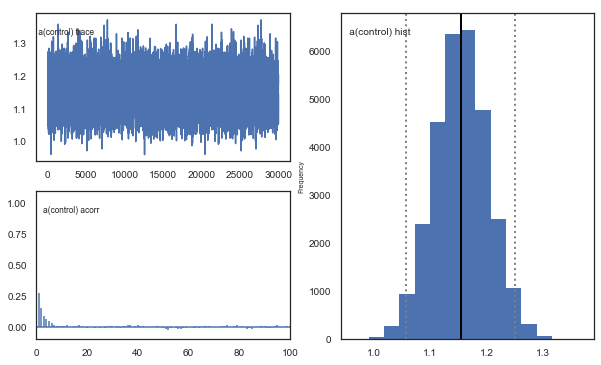

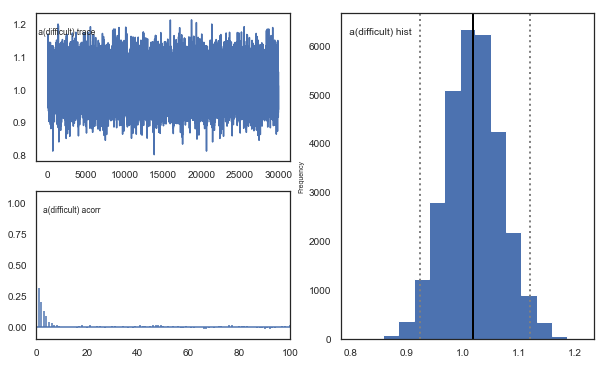

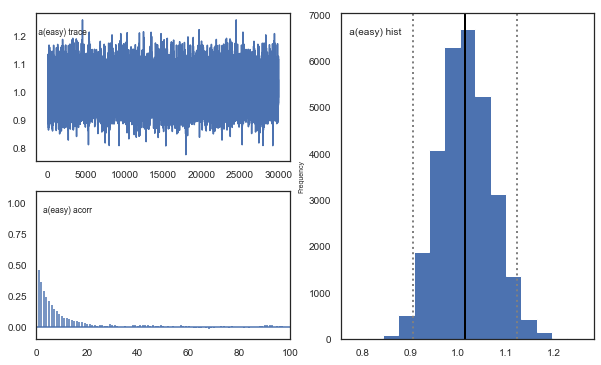

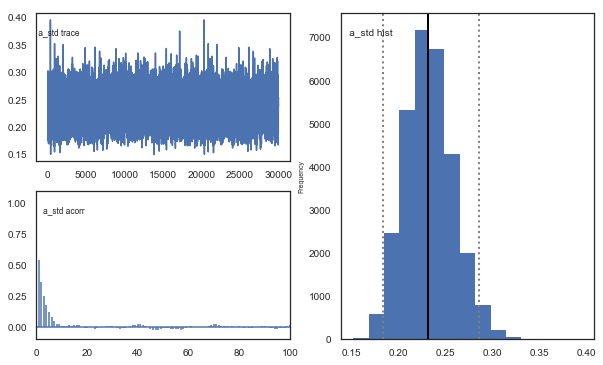

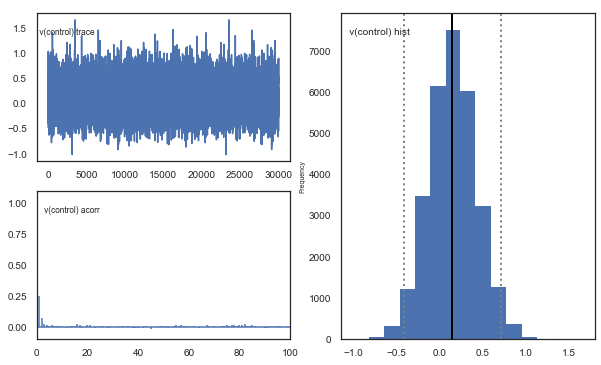

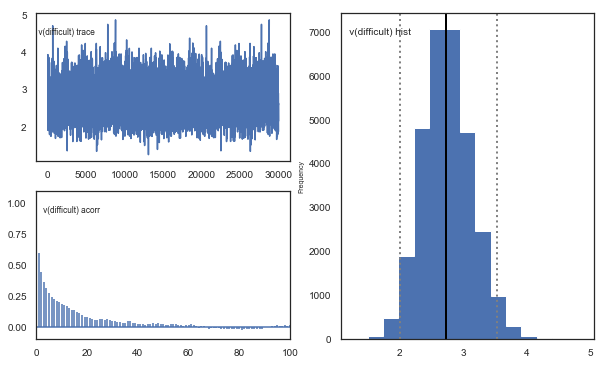

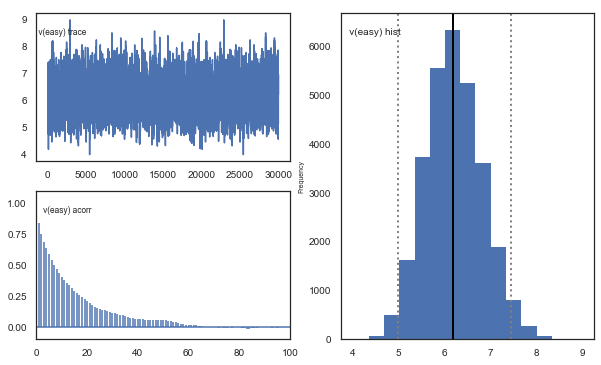

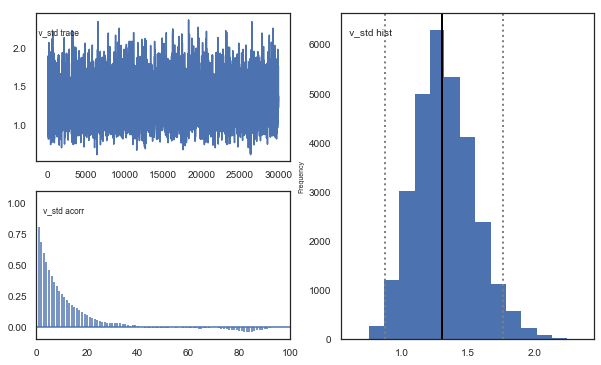

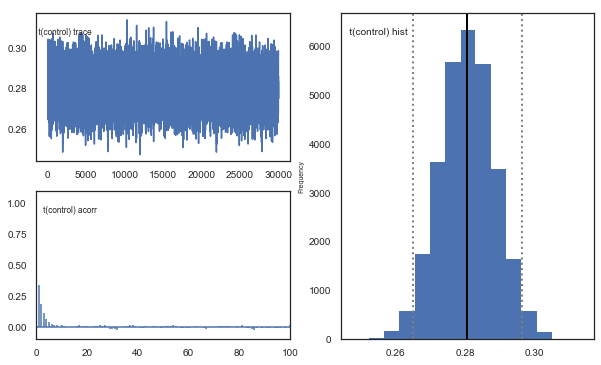

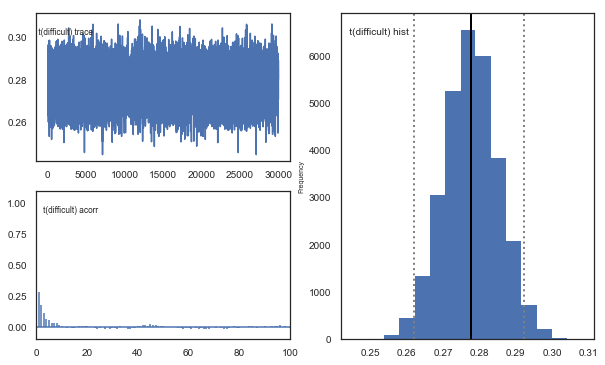

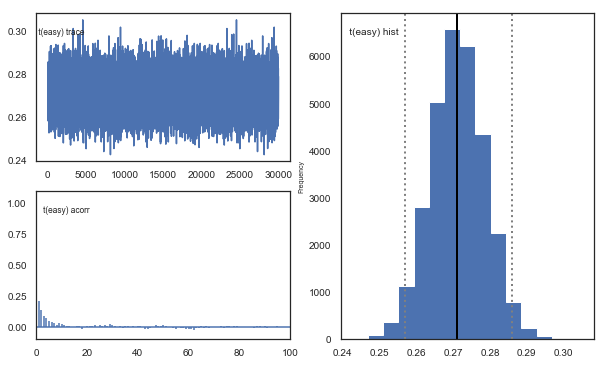

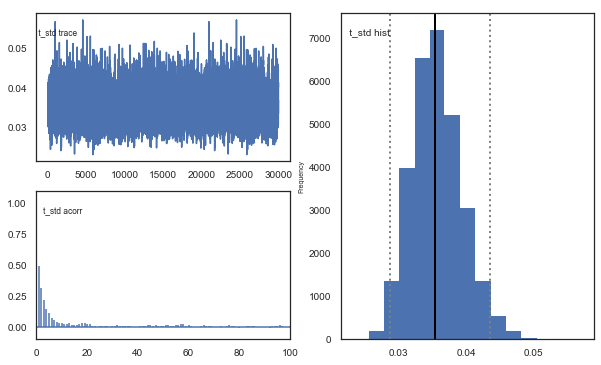

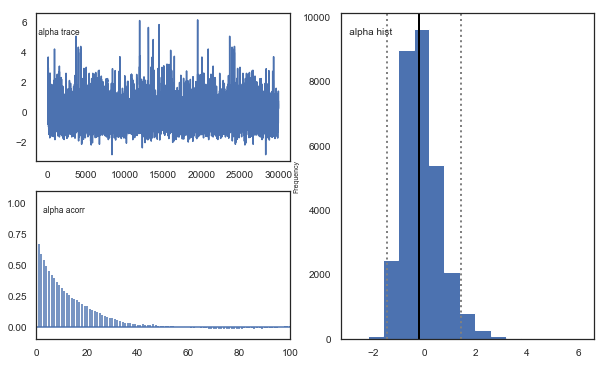

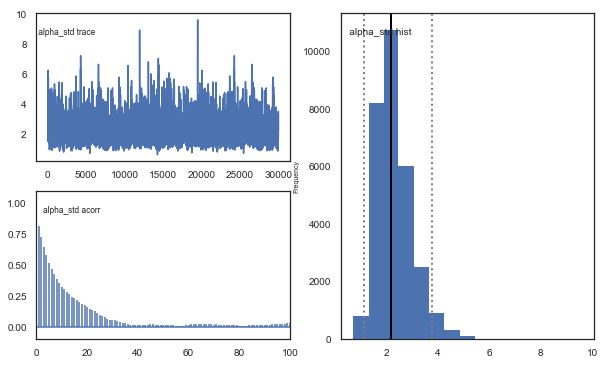

In [9]:
M10_concat.plot_posteriors()

In [10]:
M10_traces = M10_concat.get_traces()

In [11]:
M10_traces.to_csv(r'C:\Users\Hubsc\OneDrive\Desktop\DiscriminationStudy\M10_Final_Draws.csv', index = False, header = True, sep = ';')